In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

# The datasets used are part of my research datasets.
My research focus is in the Infrastructure Management, specifically covering Asphalt pavements. I investigate road pavement cracks over time to allow informed predictions of cracking/distress progress and the corresponding maintenance costs and greenhouse gas emissions. The dataset used in this research comes from Washington State DOT.

In [2]:
ds = pd.read_csv('../modelDatasets/ndata.csv') # This dataset contains pavement segments each of about 0.1 mile long
# with the respective pavement characteristics
tdata = pd.read_csv('../modelDatasets/wtraffic.csv') # This dataset is the larger dataset with unique features which
# I wanted to merge into the previous dataset

In [3]:
tdb = tdata[['UID', 'AADT', 'ptrucks']] # Unique variables I wanted to merge

In [4]:
df = pd.merge(ds,tdb, how = 'left', left_on = 'UID', right_on = 'UID') # mergning the datasets using unique ID (UID)
df = df.drop_duplicates(subset = 'UID') # Drops all the duplicate rows created
print len(ds) == len(df)
print len(ds), len(df)

True
4083 4083


In [5]:
df.head()

,Unnamed: 0,UID,IsBridge,Lane Surface Type,LaneMiles,Region_x,FFClass,SurfaceTypeCode,STDescription,TreatBaseCode,...,MinT,MaxT,FTCycles,actbthick,pctbthick,ftprep,BA,AA,AADT,ptrucks
0,0,650,0,ACP,0.20,North Central,Rural Other Principal Arterial,D2,ACP CLASS 1/2IN PG58-34,0,...,-5.48,21.600000,38,0,0,78155.358887,0,0,4257,8.42
60,1,2651,0,ACP,0.30,Eastern,Rural Other Principal Arterial,BA,ACP CLASS B AR4000W,0,...,-8.73,30.420000,84,0,0,28866.599487,1,0,7834,12.01
85,2,1193,0,ACP,0.20,North Central,Urban Other Freeway/Expressway,BA,ACP CLASS B AR4000W,0,...,-4.85,33.630001,21,0,0,4056.779846,1,0,21068,13.73
129,3,1070,0,ACP,0.20,North Central,Rural Other Freeway/Expressway,BA,ACP CLASS B AR4000W,0,...,-6.27,32.840000,21,0,0,6786.360077,1,0,14987,12.31
213,4,1192,0,ACP,0.12,North Central,Urban Other Freeway/Expressway,H2,ACP CLASS 1/2IN PG70-28,0,...,-4.85,33.630001,21,0,0,4056.779846,0,0,19317,13.73


In [6]:
df['Trucks'] = df.AADT.mul(df.ptrucks).mul(365/100) #Number of truck traffic traversing the respective pavement segments

df['PCars'] = df.AADT.mul(365).sub(df.Trucks) # Number of passenger cars (not trucks) for the entire year

In [7]:
df[['Trucks', 'PCars']].describe()

,Trucks,PCars
count,4083.000000,4083.000000
mean,528643.763762,6875063.705011
std,720113.660531,9141392.982413
min,5787.540000,64336.550000
25%,164405.310000,1554563.800000
50%,288029.700000,3852462.930000
75%,532908.600000,8068841.405000
max,4794933.600000,68612017.280000


In [8]:
#df.to_csv('../modelDatasets/mdata.csv') # Saving the dataset

In [9]:
# The font styles
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
axis_bgcolor = '#f0f0f0'

In [10]:
df.columns

Index([u'Unnamed: 0', u'UID', u'IsBridge', u'Lane Surface Type', u'LaneMiles',
       u'Region_x', u'FFClass', u'SurfaceTypeCode', u'STDescription',
       u'TreatBaseCode', u'TreatBaseDescription', u'TBThick', u'untrthick',
       u'Y_ESAL', u'MajorRehabYear', u'Cum_ESAL', u'SURFTHK', u'ULT',
       u'TSfThick', u'tmin', u'tmax', u'cumESALs', u'IRIsi', u'Alli', u'Long',
       u'E_Alli', u'E_Long', u'prep', u'MinT', u'MaxT', u'FTCycles',
       u'actbthick', u'pctbthick', u'ftprep', u'BA', u'AA', u'AADT',
       u'ptrucks', u'Trucks', u'PCars'],
      dtype='object')

In [11]:
#Checking for the unique regions in the dataset
df.Region_x.unique()

array(['North Central', 'Eastern', 'Northwest', 'Olympic', 'Southwest',
       'South Central'], dtype=object)

In [12]:
# The following series is helpful to indicate where the majority of the segments come from, and to evaluate
# whether the selection is fair enough.
WS_Regions = df.Region_x.value_counts()

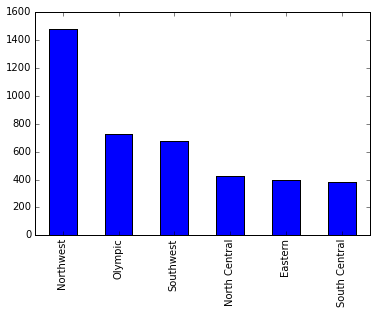

In [13]:
# matplotlib bar chart
WS_Regions.plot(kind='bar')

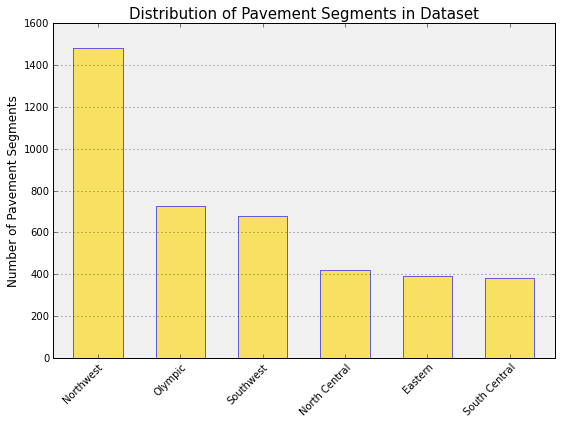

In [14]:
# style the chart to make it look nicer
ax = WS_Regions.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
                    color='gold', edgecolor='b', grid=False, ylim=[0, 1600])

ax.set_xticklabels(WS_Regions.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_axis_bgcolor(axis_bgcolor)   
ax.set_title('Distribution of Pavement Segments in Dataset', fontproperties=title_font)
ax.set_xlabel('')
ax.set_ylabel('Number of Pavement Segments', fontproperties=label_font)

plt.show()

# Importing the coordinate dataset

In [15]:
cdf = pd.read_csv('../FinalDatasets/RCsegCoord.csv')

In [16]:
cdf.head()

,Unnamed: 0,UID,Longitude,Latitude
0,0,222,-121.802218,47.860322
1,1,540,-121.252570,47.715980
2,2,2431,-118.301093,47.646535
3,3,704,-121.000382,47.774584
4,4,776,-120.868954,47.787672


In [17]:
#merging coordinate dataframe to current dataset
ndf = pd.merge(df, cdf, how='left', left_on = 'UID', right_on = 'UID')
print len(ndf) == len(df)

True


In [18]:
ndf.head()

,Unnamed: 0_x,UID,IsBridge,Lane Surface Type,LaneMiles,Region_x,FFClass,SurfaceTypeCode,STDescription,TreatBaseCode,...,ftprep,BA,AA,AADT,ptrucks,Trucks,PCars,Unnamed: 0_y,Longitude,Latitude
0,0,650,0,ACP,0.20,North Central,Rural Other Principal Arterial,D2,ACP CLASS 1/2IN PG58-34,0,...,78155.358887,0,0,4257,8.42,107531.82,1446273.18,6116,-121.081023,47.747946
1,1,2651,0,ACP,0.30,Eastern,Rural Other Principal Arterial,BA,ACP CLASS B AR4000W,0,...,28866.599487,1,0,7834,12.01,282259.02,2577150.98,19,-117.836807,47.667265
2,2,1193,0,ACP,0.20,North Central,Urban Other Freeway/Expressway,BA,ACP CLASS B AR4000W,0,...,4056.779846,1,0,21068,13.73,867790.92,6822029.08,7299,-120.314557,47.467898
3,3,1070,0,ACP,0.20,North Central,Rural Other Freeway/Expressway,BA,ACP CLASS B AR4000W,0,...,6786.360077,1,0,14987,12.31,553469.91,4916785.09,54,-120.552730,47.543849
4,4,1192,0,ACP,0.12,North Central,Urban Other Freeway/Expressway,H2,ACP CLASS 1/2IN PG70-28,0,...,4056.779846,0,0,19317,13.73,795667.23,6255037.77,7302,-120.314557,47.467898


# Next step is to plot a scatter map to show which segments/region have the highest traffic volumes

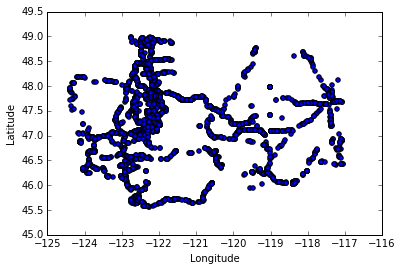

In [19]:
# scatter plot the longitude and latitude data, with matplotlib defaults
ndf.plot(kind='scatter', x='Longitude', y='Latitude')

In [20]:
# Sorting the dataframe using AADT (Average Annual Daily Traffic) variable
tdb = ndf.sort(columns='AADT', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [21]:
# Index for top 10 highly trafficked pavement segments
most_trafficked_segments = tdb.head(10)
most_trafficked_segments['rank'] = np.arange(10)+1

/Users/Alan/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


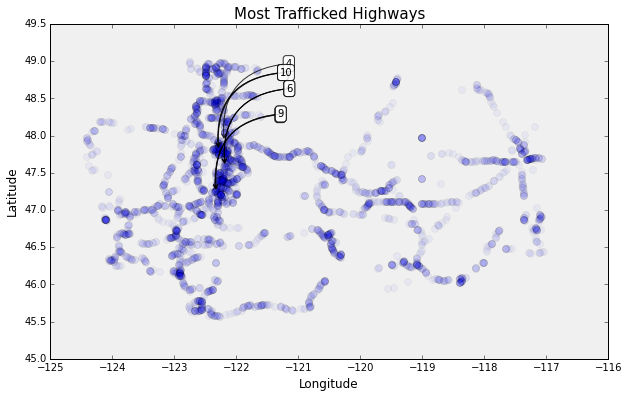

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ts_scatter = ax.scatter(x=ndf['Longitude'], y=ndf['Latitude'], c='b', edgecolor='k', alpha=.04, s=50)

# set font of tick labels
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

# set title, axis labels, background color
ax.set_title('Most Trafficked Highways', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)
ax.set_axis_bgcolor(axis_bgcolor)

# annotate each of the most visited cities on the map
bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
annotate_segments = lambda row: ax.annotate(row['rank'], 
                                          xy=(row['Longitude'], row['Latitude']),
                                          xytext=(row['Longitude'] + 1, row['Latitude'] + 1),
                                          fontproperties=annotation_font,
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
most_trafficked_segments.apply(annotate_segments, axis=1)
    
plt.show()

The above map shows the most trafficked highway segments in Washington State. It is quite clear from the map that the North-West has the most highly trafficked segments. In fact the top 50 segments were all from the North-Western region of Washington State.

# Line graph
I will investigate the variation of cracking level (Alligator Cracking) among the highest (50) trafficked pavements and the lowest (50).

In [23]:
top50 = tdb.head(50) #top 50
top50.index = np.arange(50)+1
top50.loc[:,'High'] = np.array(top50.Alli)
bot50 = tdb.tail(50) #bottom 50
bot50.index = np.arange(50)+1
bot50.loc[:,'Low'] = np.array(bot50.Alli)

/Users/Alan/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/core/indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Alan/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [24]:
top50cracking = top50.High
bot50cracking = bot50.Low

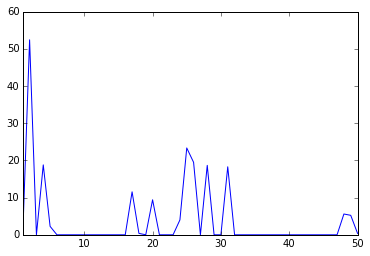

In [25]:
bot50cracking.plot(kind='line')

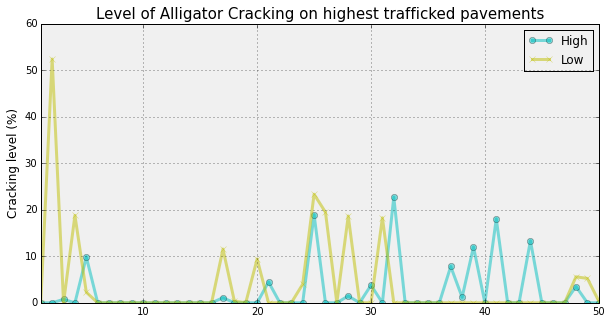

In [26]:
# create a nicer line plot
fig, ax = plt.subplots() # if something is not going to be used, you could use _, to represent that object.
                         # in this ex, fig, ax could be written as _, ax... if fig wasn't gonna be used
ax = top50cracking.plot(kind='line',
                    figsize=[10, 5],
                    linewidth='3', 
                    alpha=0.5,
                    marker='o',
                    color='c')
ax = bot50cracking.plot(kind='line',
                    figsize=[10, 5],
                    linewidth='3', 
                    alpha=0.5,
                    marker='x',
                    color='y')

ax.xaxis.grid(True)
ax.yaxis.grid(True)

# set tick labels, axis labels, and title
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Level of Alligator Cracking on highest trafficked pavements', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Cracking level (%)', fontproperties=label_font)
ax.set_axis_bgcolor(axis_bgcolor)
ax.legend(loc ='best')
plt.show()

What can be infered from the above plot is that most of the segments are maintained at low levels of cracking distress. Howevers there are some noticeable peaks, and it is those pavement segments that have low traffic volumes. This might imply that low-trafficked segments tend to be neglected and they end up accumulating higher levels of distress. Those with higher traffic volumes are maintained at moderately lower levels of cracking distress.

# Pie Chart

In [27]:
ndf.columns

Index([u'Unnamed: 0_x', u'UID', u'IsBridge', u'Lane Surface Type',
       u'LaneMiles', u'Region_x', u'FFClass', u'SurfaceTypeCode',
       u'STDescription', u'TreatBaseCode', u'TreatBaseDescription', u'TBThick',
       u'untrthick', u'Y_ESAL', u'MajorRehabYear', u'Cum_ESAL', u'SURFTHK',
       u'ULT', u'TSfThick', u'tmin', u'tmax', u'cumESALs', u'IRIsi', u'Alli',
       u'Long', u'E_Alli', u'E_Long', u'prep', u'MinT', u'MaxT', u'FTCycles',
       u'actbthick', u'pctbthick', u'ftprep', u'BA', u'AA', u'AADT',
       u'ptrucks', u'Trucks', u'PCars', u'Unnamed: 0_y', u'Longitude',
       u'Latitude'],
      dtype='object')

In [28]:
PavRehab = ndf[ndf.MajorRehabYear> 2000]
print len(PavRehab)

2731


In [29]:
regionRehab = PavRehab.Region_x.value_counts()

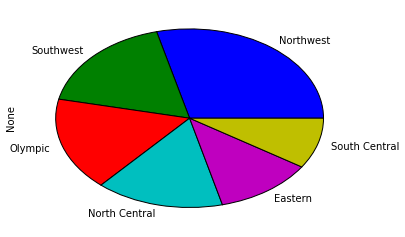

In [30]:
regionRehab.plot(kind='pie')

The region with the highest number of pavements that were rehabilitated is the NorthWest. This graph just shows the number of pavements rehabilitated as a proportion of the entire state of Washington. What would have been more informative is the proportion of pavements rehabilited out of the total number of segments in the respective regions. However, for the assignment this suffices to show the use of pie chart to display information.